<p style="font-family: Arials; line-height: 1.3; font-size: 30px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #23527c">Cardiovascular disease detction 🩺</p>


![](https://img.freepik.com/free-vector/cardiologists-examining-heart-with-stethoscope-blood-samples-lab-tubes-among-pills-heartbeat-diagram-vector-illustration-cardiology-medical-examination-heart-disease-concept_74855-9817.jpg)

# <span style="font-family: Arials; font-size: 25px; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #23527c">Problem Statement</span>
<hr style="height: 0.5px; border: 0; background-color: 'Black'">

With a plethora of medical data available and the rise of Data Science, a host of startups are taking up the challenge of attempting to create indicators for the forseen diseases that might be contracted! Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by CVDs. People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help. In this way, we try to solve automate another problem that occurs in the nature with a view to counter it and focus on to the next problem with the help of AI techniques!



# <span style="font-family: Arials; font-size: 25px; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #23527c">Objective</span>
<hr style="height: 0.5px; border: 0; background-color: 'Black'">

To classify / predict whether a patient is prone to heart failure depending on multiple attributes.

# <span style="font-family: Arials; font-size: 25px; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #23527c"> Data Description</span>
<hr style="height: 0.5px; border: 0; background-color: 'Black'">

This dataset has created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes.

- **Age** : age of the patient [years]
- **Sex** : sex of the patient [M: Male, F: Female]
- **ChestPainType** : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- **RestingBP** : resting blood pressure [mm Hg]
- **Cholesterol** : serum cholesterol [mm/dl]
- **FastingBS** : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- **RestingECG** : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- **MaxHR** : maximum heart rate achieved [Numeric value between 60 and 202]
- **ExerciseAngina** : exercise-induced angina [Y: Yes, N: No]
- **Oldpeak** : oldpeak = ST [Numeric value measured in depression]
- **ST_Slope** : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- **HeartDisease** : output class [1: heart disease, 0: Normal]

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# %matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
import catboost as cb
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


<p style="font-family: Arials; line-height: 1.3; font-size: 27px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #23527c">Reading the dataset</p>


In [2]:
df = pd.read_csv('../input/heart-failure-prediction/heart.csv')
df.head(5).style.background_gradient(cmap="Set3")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.000000,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.000000,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.000000,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.500000,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.000000,Up,0


<p style="font-family: Arials; line-height: 1.3; font-size: 27px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #23527c">Overview of the dataset</p>


In [3]:
#Printing out some information about the data
def eda(data):
    print("----------Top-5- Record----------")
    print(data.head(5))
    print("-----------Information-----------")
    print(data.info())
    print("-----------Data Types-----------")
    print(data.dtypes)
    print("----------Missing value-----------")
    print(data.isnull().sum())
    print("----------Null value-----------")
    print(data.isna().sum())
    print("----------Shape of Data----------")
    print(data.shape)
eda(df)

----------Top-5- Record----------
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Coun

<p style="font-family: Arials; line-height: 1.3; font-size: 23px; font-weight: bold; letter-spacing: 2px; text-align: left; color: #23527c">As we can see, there are no missing and null values in our dataset. Well, that's a relief!</p>

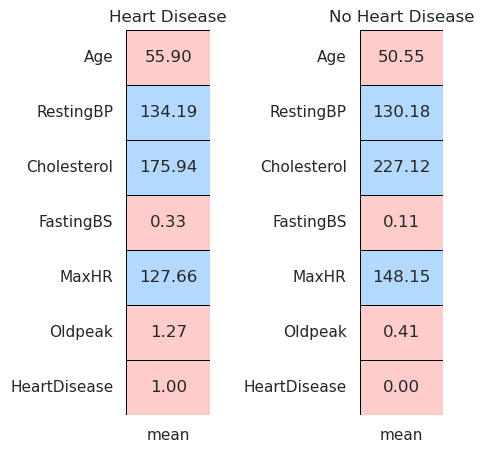

In [4]:
#We will look into the mean vals of all the features w.r.t. our target variable heart disease.
yes = df[df['HeartDisease'] == 1].describe().T
no = df[df['HeartDisease'] == 0].describe().T
colors = ['#ffcccc','#b3d9ff']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

**Mean** values of all the features for cases of heart diseases and non-heart diseases.

---

<p style="font-family: Arials; line-height: 1.3; font-size: 27px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #23527c">Exploratory data analysis</p>

Moving ahead let's have a look at the distribution of our dependent variable - **HeartDisease**

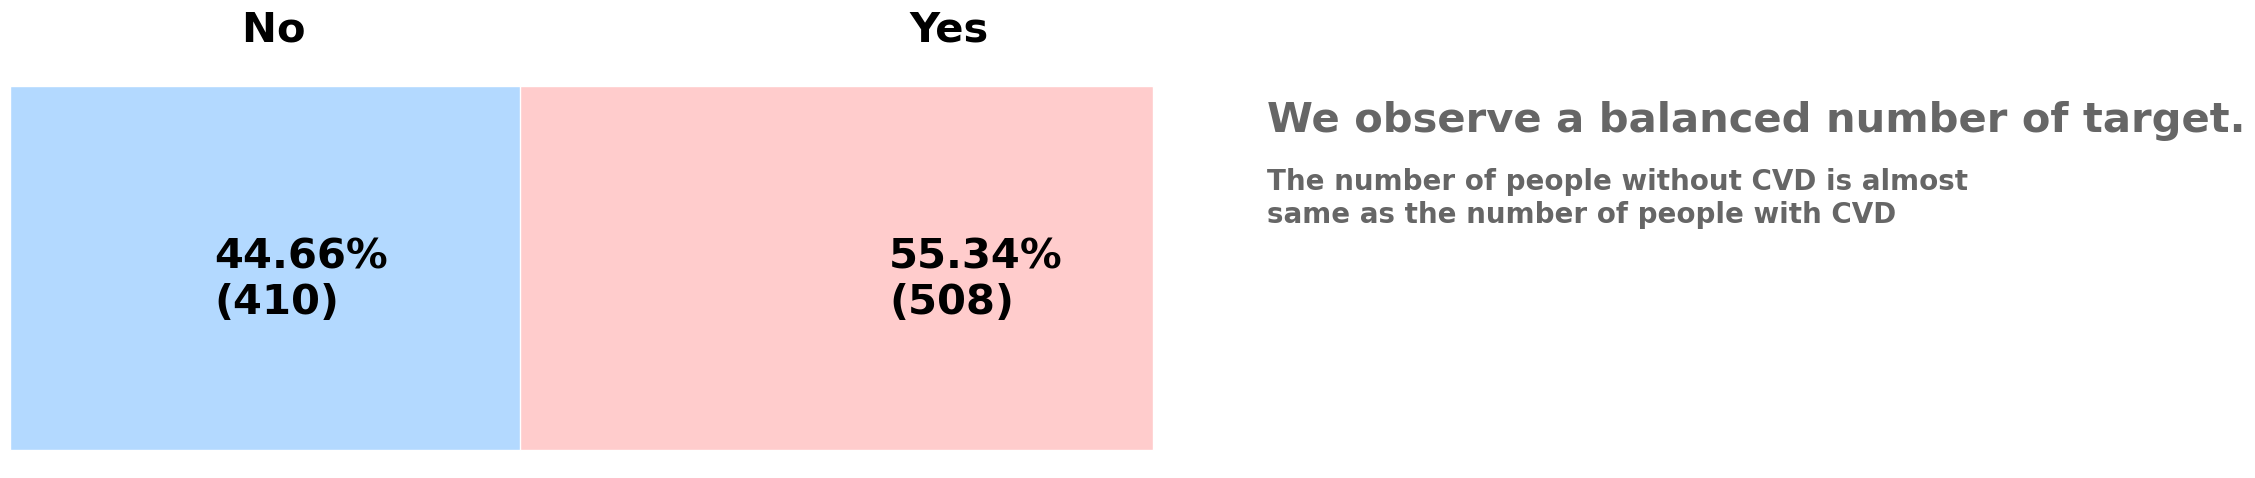

In [5]:
group_Outcome= df.groupby('HeartDisease')['Age'].count().reset_index()
group_Outcome.rename(columns={'Age':'Count'}, inplace=True)
group_Outcome['Percentages'] = round(group_Outcome['Count']/sum(group_Outcome['Count'])*100,2)

# fig
fig = plt.figure(figsize=(12,4))

# axes
axes = fig.add_axes([0,0,1,1])

# barh
axes.barh(width=group_Outcome['Percentages'][0]+group_Outcome['Percentages'][1], y=0, color='#ffcccc')
axes.barh(width=group_Outcome['Percentages'][0], y=0, color='#b3d9ff')

# annotation
axes.text(group_Outcome['Percentages'][0]/2.5, 0, f"{group_Outcome['Percentages'][0]}%", color='black', fontsize=30, fontweight='bold')
axes.text(group_Outcome['Percentages'][0]/2.5, -0.1, f"({group_Outcome['Count'][0]})", color='black', fontsize=30, fontweight='bold')
axes.text((group_Outcome['Percentages'][0]+group_Outcome['Percentages'][1])/1.3, 0, f"{group_Outcome['Percentages'][1]}%", color='black', fontsize=30, fontweight='bold')
axes.text((group_Outcome['Percentages'][0]+group_Outcome['Percentages'][1])/1.3, -0.1, f"({group_Outcome['Count'][1]})", color='black', fontsize=30, fontweight='bold')

# title
axes.text(group_Outcome['Percentages'][0]/2.2, 0.5, 'No ', color='Black', fontsize=30, fontweight='bold')
axes.text((group_Outcome['Percentages'][0]+group_Outcome['Percentages'][1])/1.27, 0.5, 'Yes', color='Black', fontsize=30, fontweight='bold')

# conclusion
axes.text(110, 0.3, 'We observe a balanced number of target.', fontsize=30, fontweight='bold', color='black', alpha=0.6)
axes.text(110, 0.10, '''The number of people without CVD is almost 
same as the number of people with CVD''', fontsize=20, fontweight='bold', color='black', alpha=0.6)

# axis
axes.axis('off')

fig.show()

<p style="font-family: Arials; line-height: 1.3; font-size: 23px; font-weight: bold; letter-spacing: 2px; text-align: left; color: #23527c">Checking for outliers in the data</p>

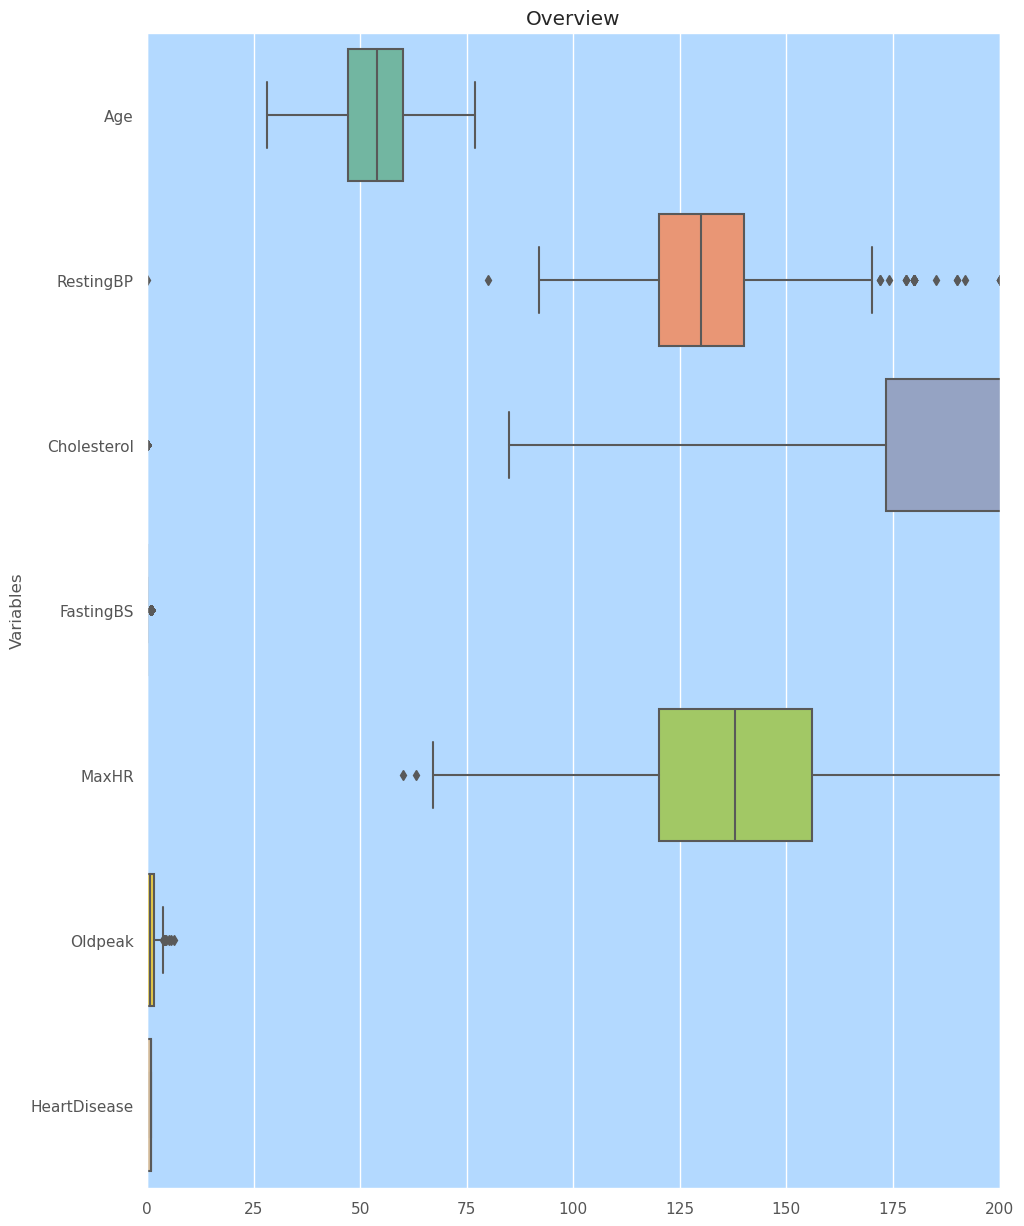

In [6]:
plt.style.use('ggplot') 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#b3d9ff')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview")
ax = sns.boxplot(data = df, 
  orient = 'h', 
  palette = 'Set2',)

There are not much outliers present in the data. We will be handling the very few present further down the notebook.


<p style="font-family: Arials; line-height: 1.3; font-size: 23px; font-weight: bold; letter-spacing: 2px; text-align: left; color: #23527c">Let's have a look at the distribution of the data</p>

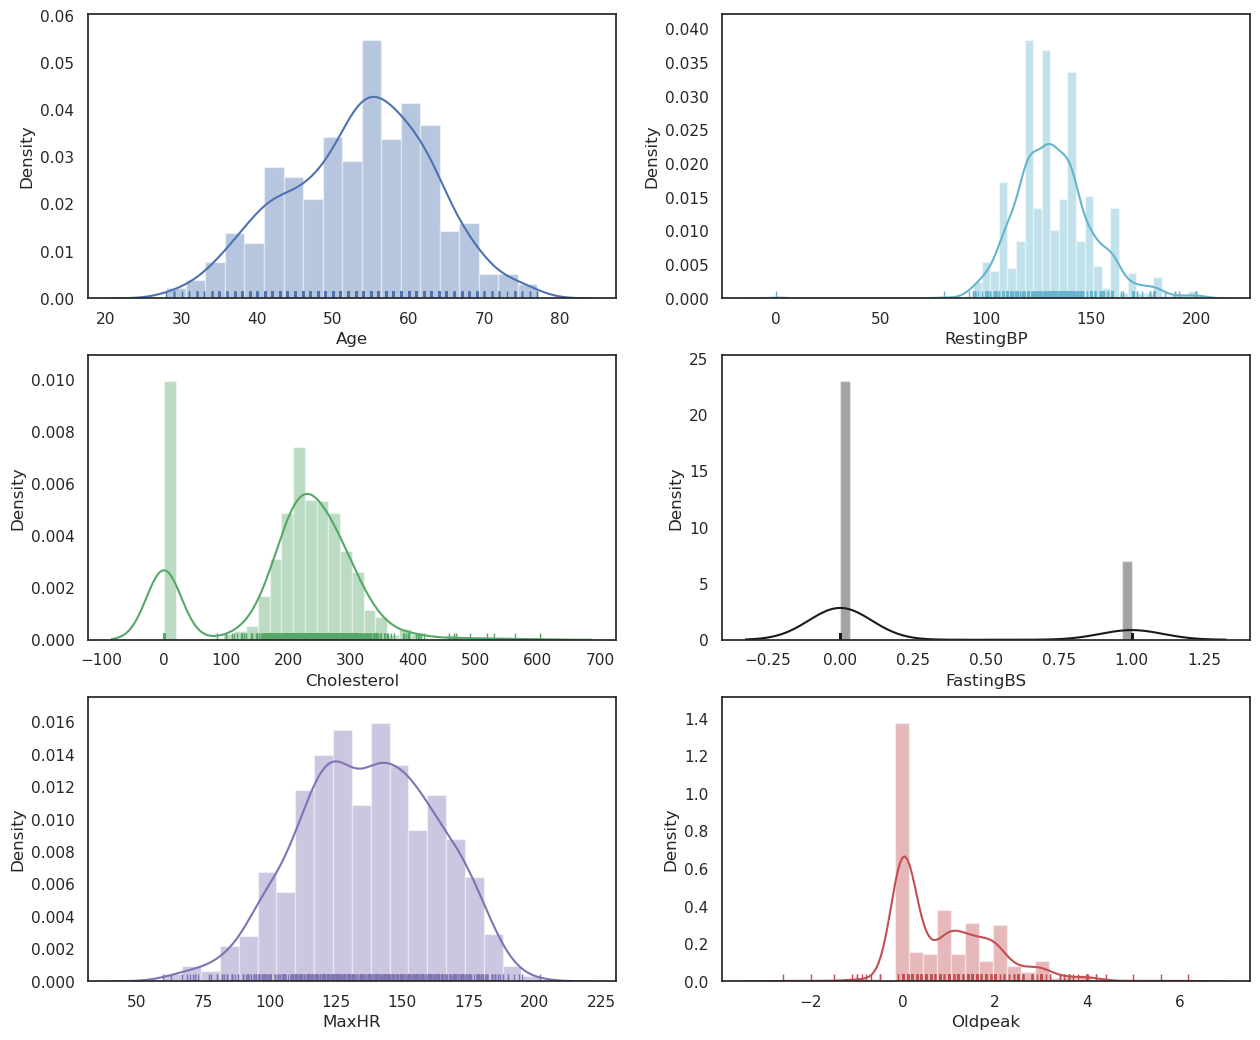

In [7]:
numerical_features= (df.select_dtypes(include=['float64','int64'])).columns
#Graphs to be plotted with these colors
colours=['b','c','g','k','m','r','y','b']
sns.set(rc={'figure.figsize':(15,17)})
sns.set_style(style='white')
for i in range(len(numerical_features)-1):
    
    plt.subplot(4,2,i+1)
    sns.distplot(df[numerical_features[i]], hist=True, rug=True, color=colours[i])

- Oldpeak is rightly skewed
- Age, RestingBP, MaxHR have a normal distribution
- Cholestrol has a bimodal data distribution

<p style="font-family: Arials; line-height: 1.3; font-size: 23px; font-weight: bold; letter-spacing: 2px; text-align: left; color: #23527c">Let's look at how Sex affect the chances of having CVD</p>

In [8]:
import plotly.graph_objects as go

colors = ['red','blue']

fig = px.histogram(df, x = df['Sex'], color = 'HeartDisease')
fig.show()

labels = [x for x in df.Sex.value_counts().index]
values = df[df['HeartDisease'] == 1]['Sex'].value_counts()

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3,pull=[0, 0, 0.06, 0])])
fig.update_traces(marker=dict(colors=colors))
fig.show()

## Out of all the CVD patients, a staggering 90% patients are male.

---
<p style="font-family: Arials; line-height: 1.3; font-size: 23px; font-weight: bold; letter-spacing: 2px; text-align: left; color: #23527c">Let's look at how Chest Pain Type affect the chances of having CVD</p>

In [9]:
fig = px.histogram(df, x = df['ChestPainType'], color = 'HeartDisease')
fig.show()

labels = [x for x in df.ChestPainType.value_counts().index]
values = df[df['HeartDisease'] == 1]['ChestPainType'].value_counts()

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3,pull=[0, 0, 0.06, 0])])
fig.update_traces(marker=dict())
fig.show()

## When it comes to the type of chest pain, ASY type holds the majority with 77% that lead to heart diseases.


---
<p style="font-family: Arials; line-height: 1.3; font-size: 23px; font-weight: bold; letter-spacing: 2px; text-align: left; color: #23527c">Let's look at how Fasting Blood Sugar Levels affect the chances of having CVD</p>

In [10]:
fbs = df[df['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]
fig = go.Figure(data=[go.Pie(labels=['FBS < 120 mg/dl','FBS > 120 mg/dl'], values=fbs, hole=.3,pull=[0, 0, 0.06, 0])])
fig.update_traces(marker=dict())
fig.show()

## Fasting Blood Sugar level < 120 mg/dl displays high chances of heart diseases.

---
<p style="font-family: Arials; line-height: 1.3; font-size: 23px; font-weight: bold; letter-spacing: 2px; text-align: left; color: #23527c">Let's look at how RestingECG affect the chances of having CVD</p>

In [11]:
fig = px.histogram(df, x = df['RestingECG'], color = 'HeartDisease')
fig.show()

labels = [x for x in df.RestingECG.value_counts().index]
values = df[df['HeartDisease'] == 1]['RestingECG'].value_counts()

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3,pull=[0, 0, 0.06, 0])])
fig.update_traces(marker=dict())
fig.show()

## For RestingECG, Normal level accounts for 56% chances of heart diseases than LVH and ST levels.

---
<p style="font-family: Arials; line-height: 1.3; font-size: 23px; font-weight: bold; letter-spacing: 2px; text-align: left; color: #23527c">Let's look at how Exercise Induced Angina affect the chances of having CVD</p>

In [12]:
fig = px.histogram(df, x = df['ExerciseAngina'], color = 'HeartDisease')
fig.show()

labels = [x for x in df.ExerciseAngina.value_counts().index]
values = df[df['HeartDisease'] == 1]['ExerciseAngina'].value_counts()

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3,pull=[0, 0, 0.06, 0])])
fig.update_traces(marker=dict())
fig.show()

## Detection of Exercise Induced Angina also points towards heart diseases.

---
<p style="font-family: Arials; line-height: 1.3; font-size: 23px; font-weight: bold; letter-spacing: 2px; text-align: left; color: #23527c">Let's look at how ST_Slope readings affect the chances of having CVD</p>

In [13]:
fig = px.histogram(df, x = df['ST_Slope'], color = 'HeartDisease')
fig.show()

labels = [x for x in df.ST_Slope.value_counts().index]
values = df[df['HeartDisease'] == 1]['ST_Slope'].value_counts()

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3,pull=[0, 0, 0.06, 0])])
fig.update_traces(marker=dict())
fig.show()

## When it comes to ST_Slope readings, Flat level holds a massive chunk with 75% that may assist in detecting underlying heart problems.


---
<p style="font-family: Arials; line-height: 1.3; font-size: 23px; font-weight: bold; letter-spacing: 2px; text-align: left; color: #23527c">Let's look at how Age affect the chances of having CVD</p>

In [14]:

fig = px.histogram(df, x = df['Age'], color = 'HeartDisease')
fig.show()
fig2 = px.box(df, x = df['Age'], color = 'HeartDisease')
fig2.show()

## As we can see, the risk of CVD increases with Age

---
<p style="font-family: Arials; line-height: 1.3; font-size: 23px; font-weight: bold; letter-spacing: 2px; text-align: left; color: #23527c">Let's look at how RestingBP affect the chances of having CVD</p>

In [15]:

fig = px.histogram(df, x = df['RestingBP'], color = 'HeartDisease')
fig.show()
fig2 = px.box(df, x = df['RestingBP'], color = 'HeartDisease')
fig2.show()

## We dont see a clear relation between restingBP and risk of having CVD.

---
<p style="font-family: Arials; line-height: 1.3; font-size: 23px; font-weight: bold; letter-spacing: 2px; text-align: left; color: #23527c">Let's look at how Cholestrol affect the chances of having CVD</p>

In [16]:

fig = px.histogram(df, x = df['Cholesterol'], color = 'HeartDisease')
fig.show()
fig2 = px.box(df, x = df['Cholesterol'], color = 'HeartDisease')
fig2.show()

## In the figure above, there are values that are 0. If cholesterol is 0, it is not possible in practice, so it is likely to be judged as an outlier. So we will change the outlier to the median value.

In [17]:
df['Cholesterol'].replace(0, df['Cholesterol'].median(),inplace=True)
fig = px.histogram(df, x = df['Cholesterol'], color = 'HeartDisease')
fig.show()

##  We can see that people with cholestrol levels between 200 and 340 have a high risk of having CVD. 

---
<p style="font-family: Arials; line-height: 1.3; font-size: 23px; font-weight: bold; letter-spacing: 2px; text-align: left; color: #23527c">Let's look at how Oldpeak values affect the chances of having CVD</p>

In [18]:

fig = px.histogram(df, x = df['Oldpeak'], color = 'HeartDisease')
fig.show()
fig2 = px.box(df, x = df['Oldpeak'], color = 'HeartDisease')
fig2.show()

## Oldpeak values between 0 and 4 show a higher chance of possessing CVD.

---
<p style="font-family: Arials; line-height: 1.3; font-size: 23px; font-weight: bold; letter-spacing: 2px; text-align: left; color: #23527c">Let's look at how MaxHR values affect the chances of having CVD</p>

In [19]:

fig = px.histogram(df, x = df['MaxHR'], color = 'HeartDisease')
fig.show()
fig2 = px.box(df, x = df['MaxHR'], color = 'HeartDisease')
fig2.show()

## People with MaxHR values between 100 and 140 seem to have a slightly higher risk of having CVD.


<p style="font-family: Arials; line-height: 1.3; font-size: 23px; font-weight: bold; letter-spacing: 2px; text-align: left; color: #23527c">Final Conclusions after EDA</p>

- Out of all the CVD patients, a staggering 90% patients are male. Hence, Males have a higher chance of having CVD.
- When it comes to the type of chest pain, ASY type holds the majority with 77% that lead to heart diseases.
- Fasting Blood Sugar level < 120 mg/dl displays high chances of heart diseases.
- For RestingECG, Normal level accounts for 56% chances of heart diseases than LVH and ST levels.
- Detection of Exercise Induced Angina also points towards heart diseases. Hence People with exercise induced Angina have a higher chance of being diagnosed with CVD.
- When it comes to ST_Slope readings, Flat level holds a massive chunk with 75% that may assist in detecting underlying heart problems.
- The risk of CVD increases with Age
- We can see that people with cholesterol levels between 200 and 340 have a high risk of having CVD.
- Oldpeak values between 0 and 4 show a higher chance of possessing CVD.
- People with MaxHR values between 100 and 140 seem to have a slightly higher risk of having CVD.



---
<p style="font-family: Arials; line-height: 1.3; font-size: 27px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #23527c">Label Encoding categorical data</p>

### Starting with Categorical data, we will first create a deep copy of our data and perform label encoding on the categorical features.

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

---
<p style="font-family: Arials; line-height: 1.3; font-size: 27px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #23527c">Scaling the Data</p>

We have 2 options for data scaling : 
1. Normalization
2. Standardization. 

As most of the algorithms assume the data to be normally (Gaussian) distributed, **Normalization** is done for features whose data does not display normal distribution and **standardization** is carried out for features that are normally distributed where their values are huge or very small as compared to other features.


**Normalization** : **Oldpeak** feature is normalized as it had displayed a right skewed data distribution.

**Standardizarion** : **Age**, **RestingBP**, **Cholesterol** and **MaxHR** features are scaled down because these features are normally distributed.

In [21]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.897407,0,1,1.382928,0,0.295455,2,0
1,-0.478484,0,2,1.491752,-1.122849,0,1,0.754157,0,0.409091,1,1
2,-1.751359,1,1,-0.129513,0.786200,0,2,-1.525138,0,0.295455,2,0
3,-0.584556,0,0,0.302825,-0.492677,0,1,-1.132156,1,0.465909,1,1
4,0.051881,1,2,0.951331,-0.844832,0,1,-0.581981,0,0.295455,2,0



<p style="font-family: Arials; line-height: 1.3; font-size: 23px; font-weight: bold; letter-spacing: 2px; text-align: left; color: #23527c">Let's look at the correlation of our features with HeartDisease</p>

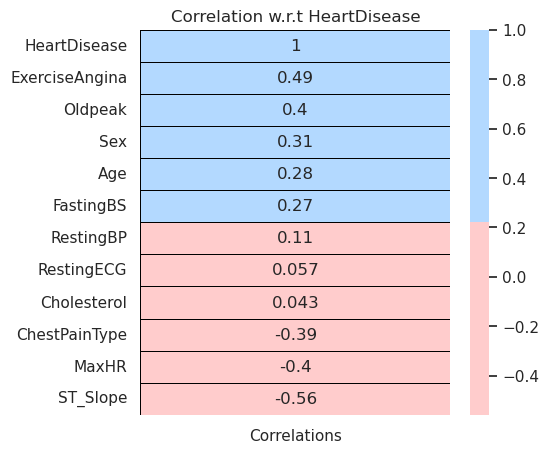

In [22]:
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
colors = ['#ffcccc','#b3d9ff']
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

## Except for RestingBP and RestingECG, everyone displays a positive or negative relationship with HeartDisease.

---
<p style="font-family: Arials; line-height: 1.3; font-size: 27px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #23527c">Feature Selection</p>



<p style="font-family: Arials; line-height: 1.3; font-size: 23px; font-weight: bold; letter-spacing: 2px; text-align: left; color: #23527c">For Categorical features we will use Chi Squared Test</p>

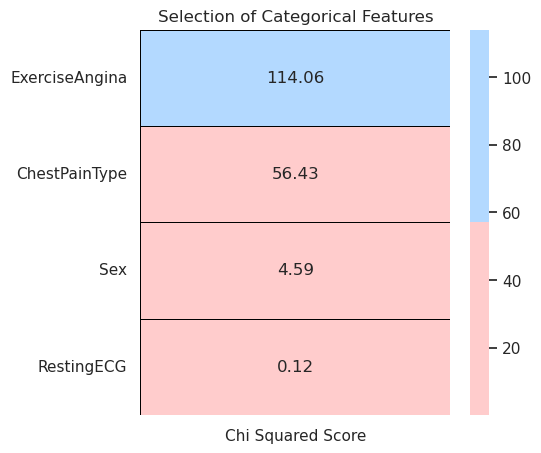

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

categorical_cols= df.select_dtypes(include=['object'])
categorical_features=categorical_cols.columns

features = df1.loc[:,categorical_features[:-1]]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

## Except for RestingECG all other features are important for predicting CVD



<p style="font-family: Arials; line-height: 1.3; font-size: 23px; font-weight: bold; letter-spacing: 2px; text-align: left; color: #23527c">For Numerical features we will use Anova Test</p>

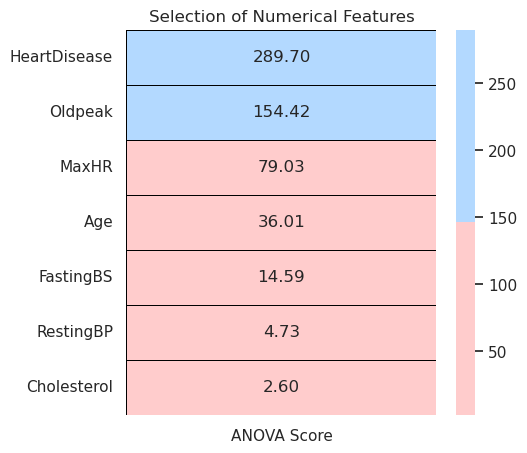

In [24]:
from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

## We will use all feature except RestingBP for our modelling.

---
<p style="font-family: Arials; line-height: 1.3; font-size: 27px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #23527c">Splitting the Data into training and testing sets</p>

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [26]:
features = df1[df1.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
target = df1['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

---
<p style="font-family: Arials; line-height: 1.3; font-size: 27px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #23527c">Modelling</p>

In [27]:

def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (5,4))
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

Accuracy :  0.8478260869565217
Cross Validation Score : 0.9112282926264156
F1 Score :  85.57
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        89
           1       0.84      0.87      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



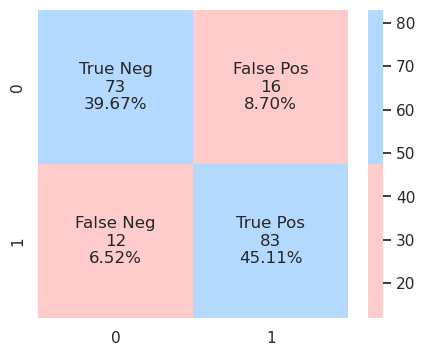

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

# logistic regression
log_params = {'penalty':['l1', 'l2'], 
              'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 100], 
              'solver':['liblinear', 'saga']} 
log_model = GridSearchCV(LogisticRegression(), log_params, cv=5) #Tuning the hyper-parameters
log_model.fit(x_train,y_train)
prediction = log_model.predict(x_test)
log_cross_val = (cross_val_score(log_model,x_train,y_train,scoring = 'roc_auc').mean())
log_f1 = round(f1_score(prediction, y_test) * 100, 2)
log_acc = accuracy_score(y_test,prediction)

print("Accuracy : ",log_acc)
print("Cross Validation Score :",log_cross_val)
print("F1 Score : ",log_f1)
model_evaluation(log_model)

Accuracy :  0.842391304347826
Cross Validation Score : 0.905965126924207
F1 Score :  85.57
              precision    recall  f1-score   support

           0       0.88      0.78      0.83        89
           1       0.81      0.91      0.86        95

    accuracy                           0.84       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



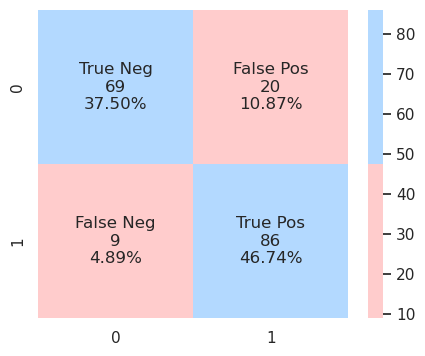

In [29]:
# knn
knn_params = {'n_neighbors': list(range(3, 20, 2)),
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
          'metric':['euclidean', 'manhattan', 'chebyshev', 'minkowski']}
knn_model = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5) #Tuning the hyper-parameters
knn_model.fit(x_train, y_train)
prediction = knn_model.predict(x_test)
knn_cross_val = (cross_val_score(knn_model,x_train,y_train,scoring = 'roc_auc').mean())
knn_f1 = round(f1_score(prediction, y_test) * 100, 2)
knn_acc = accuracy_score(y_test,prediction)

print("Accuracy : ",knn_acc)
print("Cross Validation Score :",knn_cross_val)
print("F1 Score : ",knn_f1)
model_evaluation(knn_model)

Accuracy :  0.8315217391304348
Cross Validation Score : 0.904763599425846
F1 Score :  84.58
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        89
           1       0.80      0.89      0.85        95

    accuracy                           0.83       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.83      0.83       184



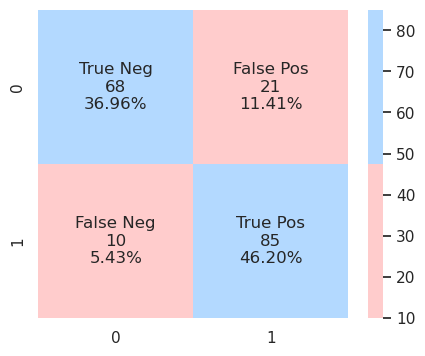

In [30]:
# svc
svc_params = {'C': [0.001, 0.01, 0.1, 1],
              'kernel': [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]}
svc_model = GridSearchCV(SVC(), svc_params, cv=5) #Tuning the hyper-parameters
svc_model.fit(x_train, y_train)
prediction = svc_model.predict(x_test)
svc_cross_val = (cross_val_score(svc_model,x_train,y_train,scoring = 'roc_auc').mean())
svc_f1 = round(f1_score(prediction, y_test) * 100, 2)
svc_acc = accuracy_score(y_test,prediction)

print("Accuracy : ",svc_acc)
print("Cross Validation Score :",svc_cross_val)
print("F1 Score : ",svc_f1)
model_evaluation(svc_model)

Accuracy :  0.8315217391304348
Cross Validation Score : 0.904763599425846
F1 Score :  84.58
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        89
           1       0.80      0.89      0.85        95

    accuracy                           0.83       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.83      0.83       184



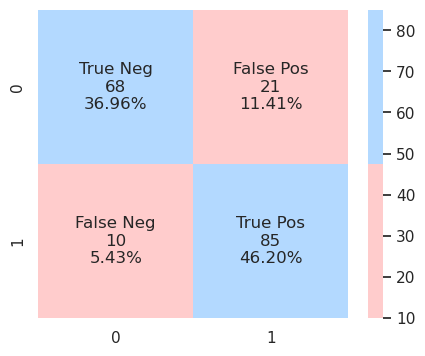

In [31]:
# svc
svc_params = {'C': [0.001, 0.01, 0.1, 1],
              'kernel': [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]}
svc_model = GridSearchCV(SVC(), svc_params, cv=5) #Tuning the hyper-parameters
svc_model.fit(x_train, y_train)
prediction = svc_model.predict(x_test)
svc_cross_val = (cross_val_score(svc_model,x_train,y_train,scoring = 'roc_auc').mean())
svc_f1 = round(f1_score(prediction, y_test) * 100, 2)
svc_acc = accuracy_score(y_test,prediction)

print("Accuracy : ",svc_acc)
print("Cross Validation Score :",svc_cross_val)
print("F1 Score : ",svc_f1)
model_evaluation(svc_model)

Accuracy :  0.8315217391304348
Cross Validation Score : 0.8807584901048848
F1 Score :  84.1
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        89
           1       0.82      0.86      0.84        95

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



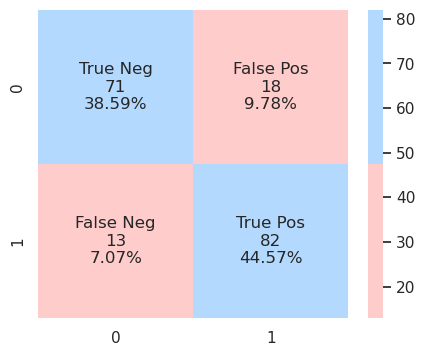

In [32]:
# decsion tree
dt_params = {'criterion' : ['gini', 'entropy'],
              'splitter': ['random', 'best'], 
              'max_depth': [3, 5, 7, 9, 11, 13]}
dt_model = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5) #Tuning the hyper-parameters
dt_model.fit(x_train, y_train)
prediction = dt_model.predict(x_test)
dt_cross_val = (cross_val_score(dt_model,x_train,y_train,scoring = 'roc_auc').mean())
dt_f1 = round(f1_score(prediction, y_test) * 100, 2)
dt_acc = accuracy_score(y_test,prediction)

print("Accuracy : ",dt_acc)
print("Cross Validation Score :",dt_cross_val)
print("F1 Score : ",dt_f1)
model_evaluation(dt_model)

Accuracy :  0.8369565217391305
Cross Validation Score : 0.9143991550159362
F1 Score :  84.85
              precision    recall  f1-score   support

           0       0.86      0.79      0.82        89
           1       0.82      0.88      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



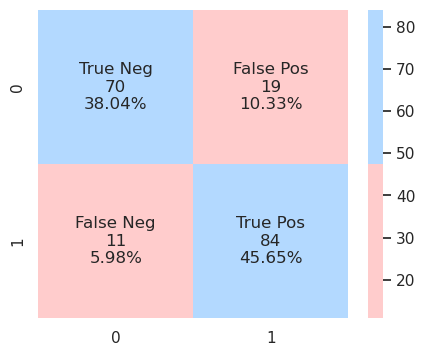

In [33]:
# rf
rf_params = {'criterion' : ['gini', 'entropy'],
             'n_estimators': list(range(5, 26, 5)),
             'max_depth': list(range(3, 20, 2))}
rf_model = GridSearchCV(RandomForestClassifier(), rf_params, cv=5) #Tuning the hyper-parameters
rf_model.fit(x_train, y_train)
prediction = rf_model.predict(x_test)
rf_cross_val = (cross_val_score(rf_model,x_train,y_train,scoring = 'roc_auc').mean())
rf_f1 = round(f1_score(prediction, y_test) * 100, 2)
rf_acc = accuracy_score(y_test,prediction)

print("Accuracy : ",rf_acc)
print("Cross Validation Score :",rf_cross_val)
print("F1 Score : ",rf_f1)
model_evaluation(rf_model)

Accuracy :  0.8369565217391305
Cross Validation Score : 0.9063163865593706
F1 Score :  84.21
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        89
           1       0.84      0.84      0.84        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



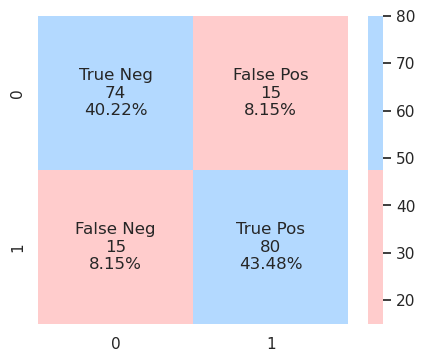

In [34]:
# rf
sgd_params = {'loss' : ['hinge', 'log', 'squared_hinge', 'modified_huber'],
              'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10],
              'penalty' : ['l2', 'l1', 'none']}
sgd_model = GridSearchCV(SGDClassifier(max_iter=10000), sgd_params, cv=5) #Tuning the hyper-parameters
sgd_model.fit(x_train, y_train)
prediction = sgd_model.predict(x_test)
sgd_cross_val = (cross_val_score(sgd_model,x_train,y_train,scoring = 'roc_auc').mean())
sgd_f1 = round(f1_score(prediction, y_test) * 100, 2)
sgd_acc = accuracy_score(y_test,prediction)

print("Accuracy : ",sgd_acc)
print("Cross Validation Score :",sgd_cross_val)
print("F1 Score : ",sgd_f1)
model_evaluation(sgd_model)

Accuracy :  0.8532608695652174
Cross Validation Score : 0.9203809916024323
F1 Score :  86.29
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        89
           1       0.83      0.89      0.86        95

    accuracy                           0.85       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



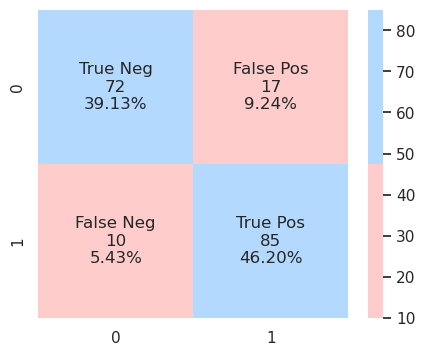

In [35]:
# lgb
lgb_params = {'n_estimators': [5, 10, 15, 20, 25, 50, 100],
                   'learning_rate': [0.01, 0.05, 0.1],
                   'num_leaves': [7, 15, 31],
                  }
lgb_model = GridSearchCV(LGBMClassifier(), lgb_params, cv=5) #Tuning the hyper-parameters
lgb_model.fit(x_train, y_train)
prediction = lgb_model.predict(x_test)
lgb_cross_val = (cross_val_score(lgb_model,x_train,y_train,scoring = 'roc_auc').mean())
lgb_f1 = round(f1_score(prediction, y_test) * 100, 2)
lgb_acc = accuracy_score(y_test,prediction)

print("Accuracy : ",lgb_acc)
print("Cross Validation Score :",lgb_cross_val)
print("F1 Score : ",lgb_f1)
model_evaluation(lgb_model)

Accuracy :  0.842391304347826
Cross Validation Score : 0.924255627105043
F1 Score :  85.13
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        89
           1       0.83      0.87      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



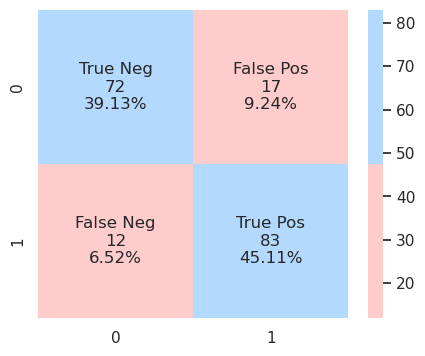

In [36]:
# xgb
xgb_params = {'max_depth': [3, 5, 7, 9],
              'n_estimators': [5, 10, 15, 20, 25, 50, 100],
              'learning_rate': [0.01, 0.05, 0.1]}
xgb_model = GridSearchCV(xgb.XGBClassifier(eval_metric='logloss'), xgb_params, cv=5) #Tuning the hyper-parameters
xgb_model.fit(x_train, y_train)
prediction = xgb_model.predict(x_test)
xgb_cross_val = (cross_val_score(xgb_model,x_train,y_train,scoring = 'roc_auc').mean())
xgb_f1 = round(f1_score(prediction, y_test) * 100, 2)
xgb_acc = accuracy_score(y_test,prediction)

print("Accuracy : ",xgb_acc)
print("Cross Validation Score :",xgb_cross_val)
print("F1 Score : ",xgb_f1)
model_evaluation(xgb_model)

Accuracy :  0.875
Cross Validation Score : 0.9218290351838874
F1 Score :  88.21
              precision    recall  f1-score   support

           0       0.89      0.84      0.87        89
           1       0.86      0.91      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



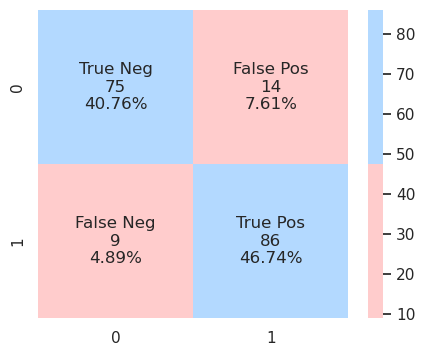

In [37]:
# cb
cb_params = {'learning_rate': [0.01, 0.05, 0.1],
             'depth': [3, 5, 7, 9]}
cb_model = GridSearchCV(cb.CatBoostClassifier(verbose=False), cb_params, cv=5) #Tuning the hyper-parameters
cb_model.fit(x_train, y_train)
prediction = cb_model.predict(x_test)
cb_cross_val = (cross_val_score(cb_model,x_train,y_train,scoring = 'roc_auc').mean())
cb_f1 = round(f1_score(prediction, y_test) * 100, 2)
cb_acc = accuracy_score(y_test,prediction)

print("Accuracy : ",cb_acc)
print("Cross Validation Score :",cb_cross_val)
print("F1 Score : ",cb_f1)
model_evaluation(cb_model)

In [38]:
models = pd.DataFrame({
    'Model': [
        'LogisticRegression', 'KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier', 
        'RandomForestClassifier', 'SGDClassifier', 'LGBMClassifier', 'XGBClassifier', 'CatBoostClassifier'
    ],
    'Model Accuracy Score': [
        log_acc, knn_acc, svc_acc, dt_acc, rf_acc,
        sgd_acc, lgb_acc, xgb_acc, cb_acc
    ],
    'Model f1 Score': [
        log_f1, knn_f1, svc_f1, dt_f1,
        rf_f1, sgd_f1, lgb_f1, xgb_f1,
        cb_f1
    ],
    'Model Cross Validation score' : [
        log_cross_val,knn_cross_val,svc_cross_val,dt_cross_val,rf_cross_val,sgd_cross_val,lgb_cross_val,xgb_cross_val,cb_cross_val
    ]
})

In [39]:
models.sort_values(by='Model Accuracy Score', ascending=False)

,Model,Model Accuracy Score,Model f1 Score,Model Cross Validation score
8,CatBoostClassifier,0.875000,88.21,0.921829
6,LGBMClassifier,0.853261,86.29,0.920381
0,LogisticRegression,0.847826,85.57,0.911228
1,KNeighborsClassifier,0.842391,85.57,0.905965
7,XGBClassifier,0.842391,85.13,0.924256
4,RandomForestClassifier,0.836957,84.85,0.914399
5,SGDClassifier,0.836957,84.21,0.906316
2,SVC,0.831522,84.58,0.904764
3,DecisionTreeClassifier,0.831522,84.10,0.880758


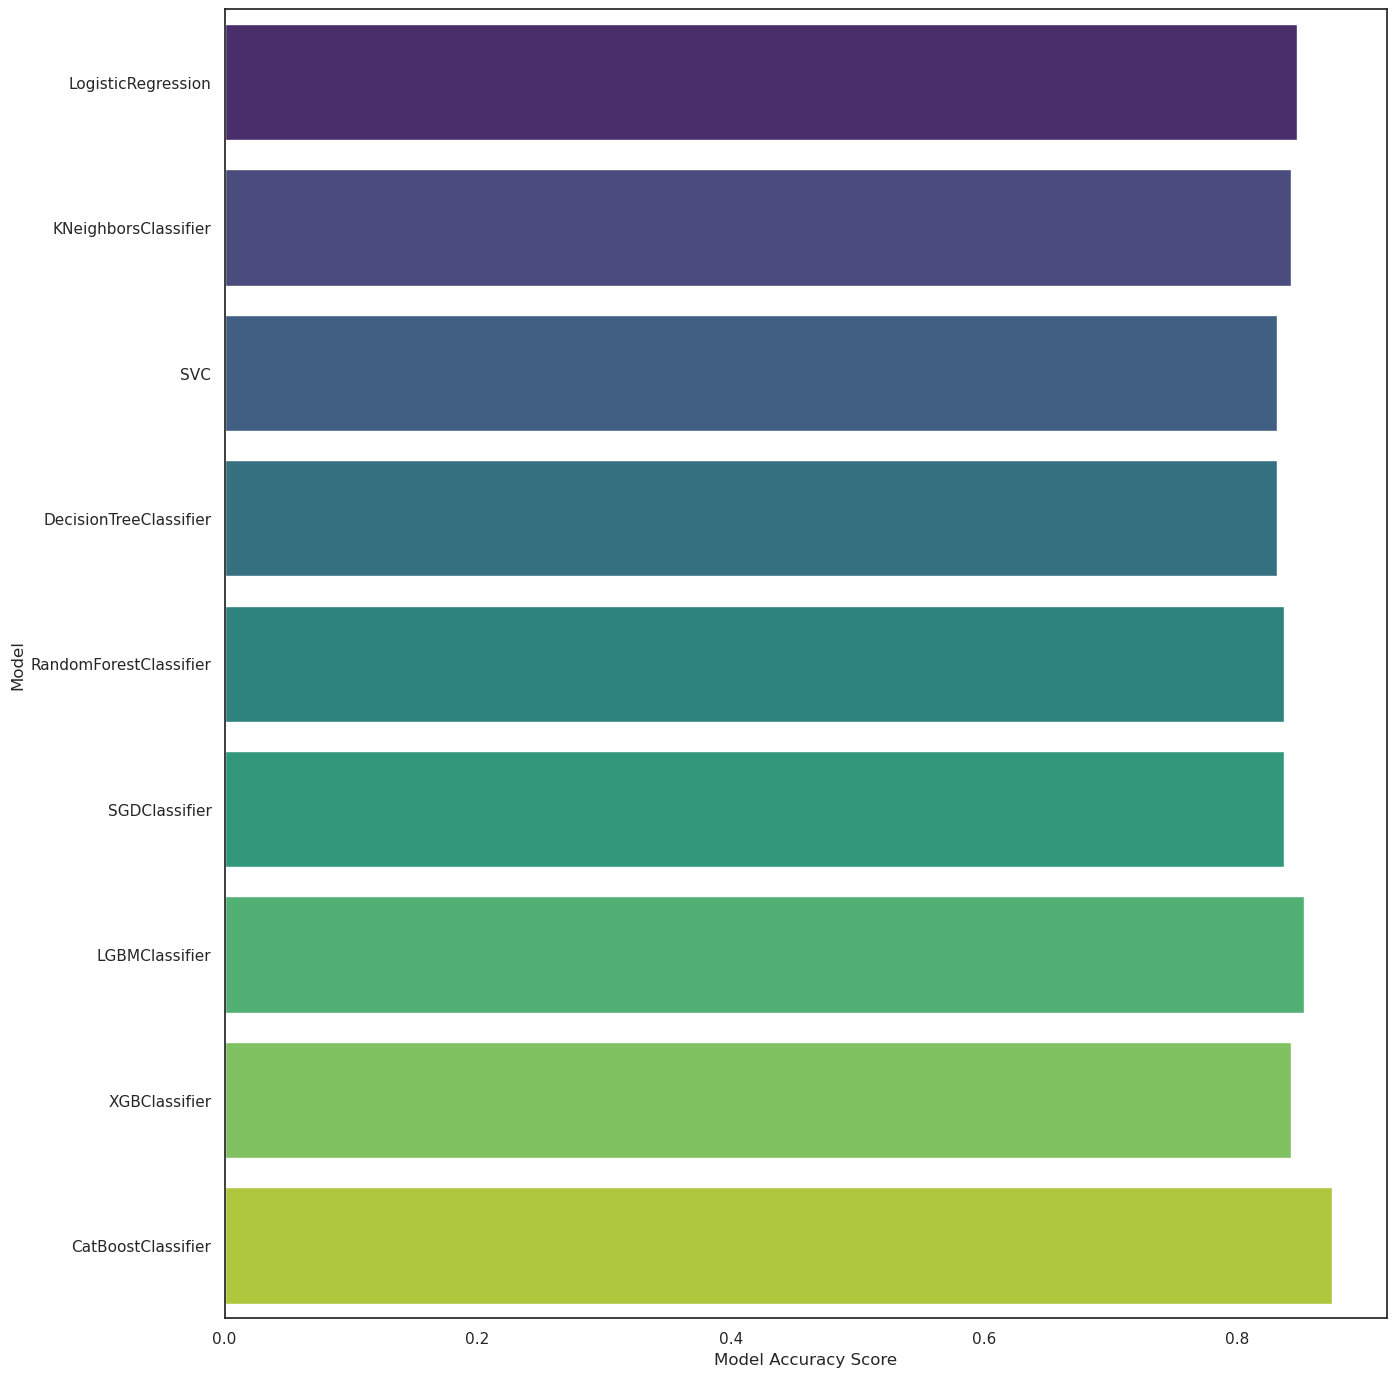

In [40]:
sns.barplot(x = models['Model Accuracy Score'], y = models['Model'], palette='viridis');


<p style="font-family: Arials; line-height: 1.3; font-size: 23px; font-weight: bold; letter-spacing: 2px; text-align: left; color: #23527c">We can see that CatBoost Classifier is the Best performing model with a score of .8750</p>

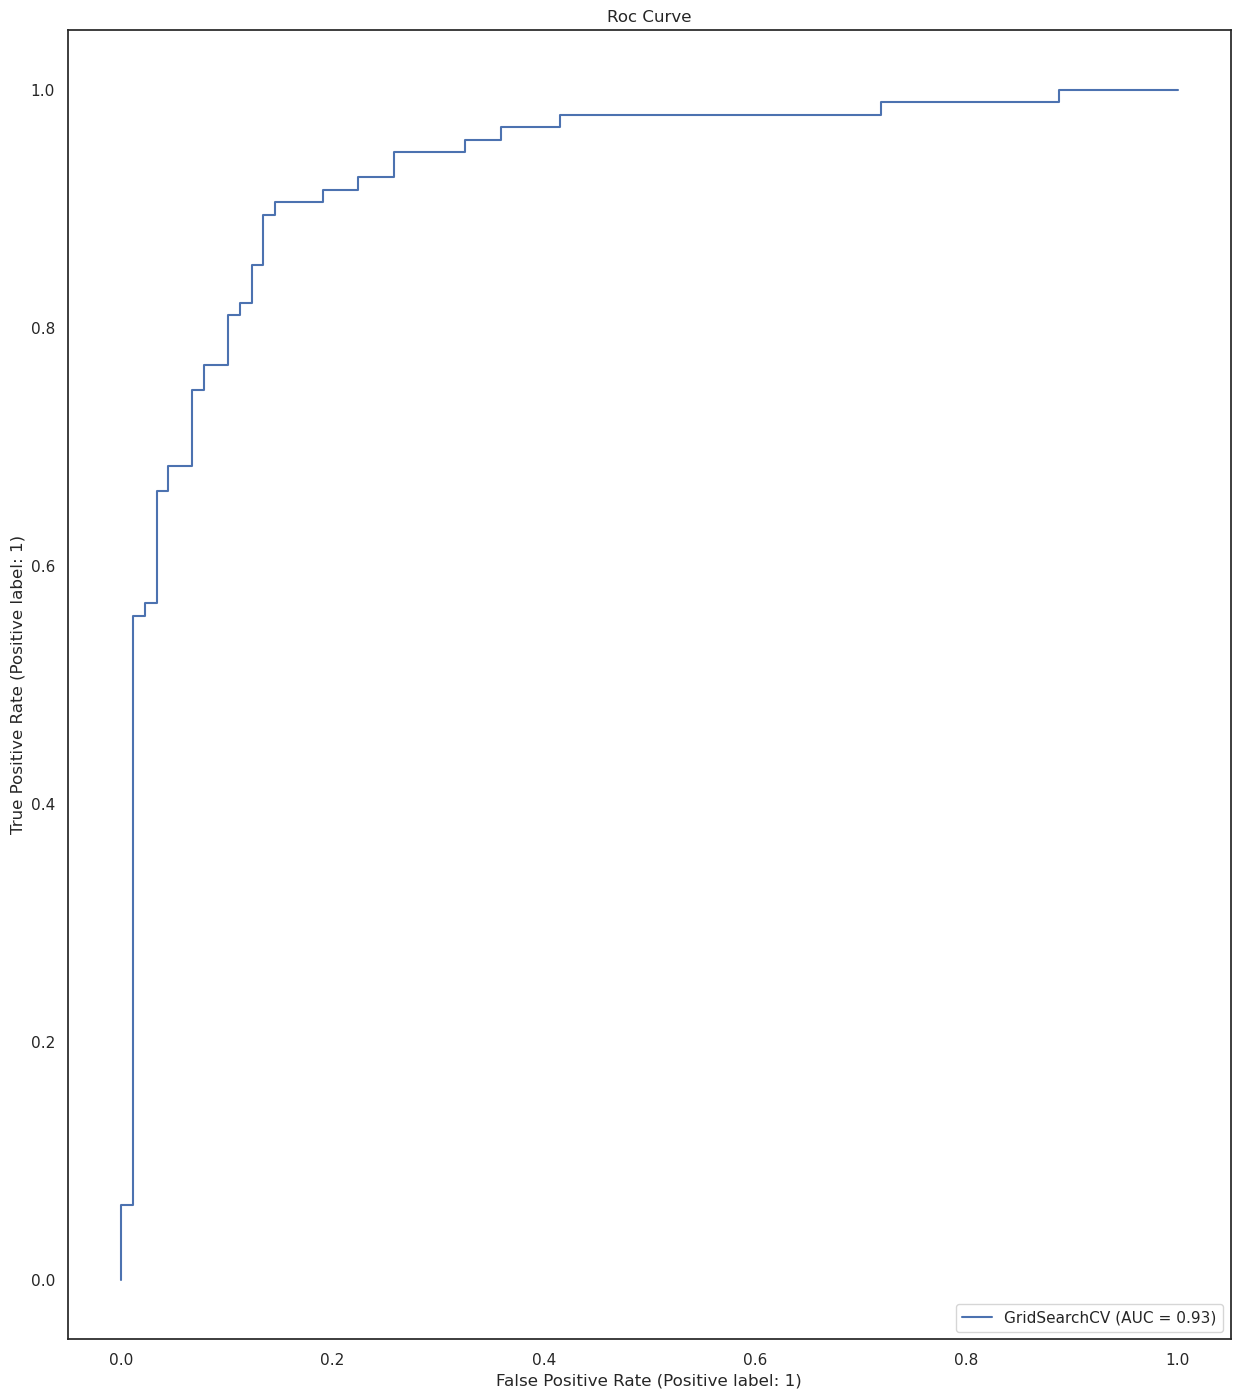

In [41]:
plot_roc_curve(cb_model, x_test, y_test);
plt.title('Roc Curve');

The ROC Curves show how well the models perform at different thresholds. The y-axis shows the True Positive Rate, or Sensitivity of the models, which is a measure of how well the model identifies patients with heart disease (true positives) and the False Positive Rate along the x-axis shows how many patients the model misclassifies as false positives. A model with a curve near the top left of the graph, with a higher true positive rate and a lower false positive rate, indicates a better capability to distinguish between the classes.